#Business Problem

A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction due to its extremely low processing fees for handling online vendors’ digital payments. This strategy has led to very low costs of acquiring new vendors. Due to this,the company was not able to build a fast and robust fraud detection system. The company’s data engineers curated a dataset that they believe follows the real world distribution of transactions on their payment gateway. The company hired Insofe and provided it with the dataset, to create a fast and robust AI based model that can detect and prevent fraudulent transactions on its payment gateway.

Importing Libraries

In [50]:
import numpy as np      #for working with arrays
import pandas as pd       #for working with datasets



Reading the train and test files

In [51]:
traindf=pd.read_csv("/content/train_data-1611220940820.csv")   #train data
testdf=pd.read_csv("/content/test_data-1611220982388.csv")      #test data

Checking the shape and head

In [52]:
traindf.shape   #shape of train data

(76529, 11)

In [53]:
testdf.shape      #shape of test data

(19133, 10)

In [54]:
traindf.sample(5)         #sample rows of the data

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
37493,53732007040375,18438436,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-0.5,2017-01-22 12:53:52+00:00,2,0
3677,1389181756312000,2765569,other_debit_cards,118335,cat_1,IND_INR,other_pcs,280.0,2017-01-04 18:48:46+00:00,2,0
8571,1110679372347481,19633761,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-13 11:53:45+00:00,4,0
13328,509527191693311,13808656,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-18 11:27:00+00:00,2,0
27037,373232448215999,3779136,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-15 22:35:47+00:00,2,0


In [55]:
testdf.sample(5)

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
3924,856644182745317,7033104,visa_master_debit_cards,78890,cat_2,IND_INR,other_pcs,20.0,2016-12-10 11:31:54+00:00,4
13803,22259181797000,18593344,e_wallet_payments,7889,cat_2,IND_INR,other_pcs,20.0,2017-01-28 10:29:14+00:00,2
16473,1406772774853649,1752976,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,400.0,2017-01-31 19:04:14+00:00,2
8488,697109077213632,18653761,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-1.0,2017-02-07 18:27:20+00:00,2
7946,42889701680064,23794884,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,6000.0,2016-12-20 17:38:01+00:00,2


In [56]:
#checking the unique values
traindf.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [57]:
testdf.nunique()

transaction_number          19133
user_id                      2617
payment_method                  6
partner_id                     20
partner_category                8
country                         1
device_type                     4
money_transacted              695
transaction_initiation      19090
partner_pricing_category        4
dtype: int64

Dropping the unnecessary attributes

In [58]:
traindf.drop(['transaction_number','country'],axis=1,inplace=True)

In [59]:
testdf.drop(['transaction_number','country'],axis=1,inplace=True)

Checking for null values

In [60]:
traindf.isnull().sum()

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [61]:
testdf.isnull().sum()

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

We can see that both train and test datasets have no null values

Checking data types

In [62]:
traindf.dtypes

user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [63]:
testdf.dtypes

user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

Dividing the data into categorical and numerical

In [64]:
train_cat=['payment_method','partner_category','device_type','transaction_initiation']
traindf[train_cat]=traindf[train_cat].astype('category')

In [65]:
test_cat=['payment_method','partner_category','device_type','transaction_initiation']
testdf[test_cat]=traindf[test_cat].astype('category')

In [66]:
traindf.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation      category
partner_pricing_category       int64
is_fraud                       int64
dtype: object

In [67]:
train_num=['user_id','partner_id','money_transacted','partner_pricing_category']

In [68]:
test_num=['user_id','partner_id','money_transacted','partner_pricing_category']

Checking for outliers in numerical columns

In [69]:
Q1=traindf[train_num].quantile(0.25)
Q3=traindf[train_num].quantile(0.75)
IQR=Q3-Q1
IQR
((traindf[train_num]<(Q1-1.5*IQR)) | (traindf[train_num]>(Q3+1.5*IQR))).any()

user_id                     True
partner_id                  True
money_transacted            True
partner_pricing_category    True
dtype: bool

EDA

In [70]:
traindf['payment_method']

0         sbi_atm_cum_debit_card
1              e_wallet_payments
2              e_wallet_payments
3              other_debit_cards
4              other_debit_cards
                  ...           
76524     sbi_atm_cum_debit_card
76525    visa_master_debit_cards
76526     sbi_atm_cum_debit_card
76527     sbi_atm_cum_debit_card
76528     sbi_atm_cum_debit_card
Name: payment_method, Length: 76529, dtype: category
Categories (6, object): ['e_wallet_payments', 'other_debit_cards', 'sbi_atm_cum_debit_card',
                         'unified_payments_interface', 'visa_master_credit_cards', 'visa_master_debit_cards']

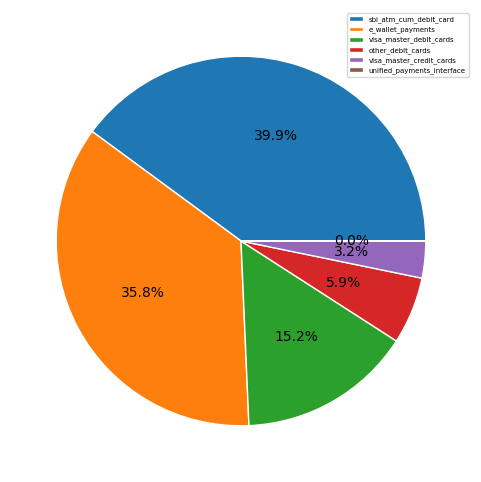

In [71]:
# Count the occurrences of each categorical variable
import matplotlib.pyplot as plt
counts = traindf['payment_method'].value_counts()

# Get the labels and values
labels = counts.index.tolist()
values = counts.tolist()

# Create the pie chart
plt.figure(figsize=(6,6))

plt.pie(values, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        autopct='%1.1f%%',)
plt.legend(labels, loc='best', fontsize=5)

plt.show()



*   Sbi_atm_cum_debit_cards is the most preferred payment method with 39.9% 
*   unified_payments_interace is not used at all.



In [72]:
traindf['device_type']

0        android_devices
1              other_pcs
2              other_pcs
3              other_pcs
4              other_pcs
              ...       
76524    android_devices
76525          other_pcs
76526    android_devices
76527    android_devices
76528    android_devices
Name: device_type, Length: 76529, dtype: category
Categories (4, object): ['android_devices', 'ios_devices', 'other_pcs', 'windows_pcs']

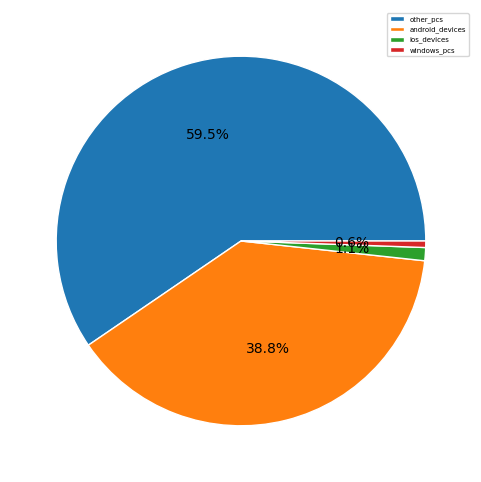

In [73]:
# Count the occurrences of each categorical variable
counts = traindf['device_type'].value_counts()

# Get the labels and values
labels = counts.index.tolist()
values = counts.tolist()

# Create the pie chart
plt.figure(figsize=(6,6))

plt.pie(values, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        autopct='%1.1f%%',)
plt.legend(labels, loc='best', fontsize=5)

plt.show()



*   Transactions are done mostly through other pcs(59.5%) and android devices(38.8%) 
*   Windows pcs are least used - 0.6%




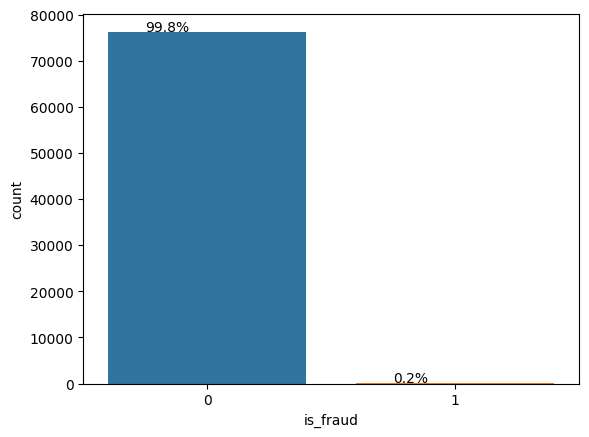

In [74]:
# Create count plot
import seaborn as sns
ax = sns.countplot(x="is_fraud", data=traindf)

# Add percentage labels
total = len(traindf)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.15
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

# Show plot
plt.show()

We can see there is high imbalance in data, i.e, 99.8% as not fraud and 0.2% is fraud


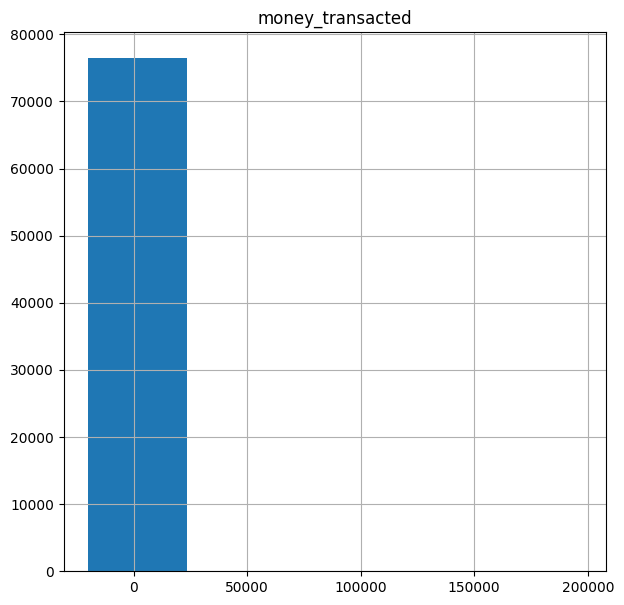

In [75]:
#Histogram plot for numerical column
traindf.hist('money_transacted',bins=5,figsize=(7,7))
plt.show()

Feature Engineering

In [76]:
traindf['transaction_initiation'] = pd.to_datetime(traindf['transaction_initiation'])
testdf['transaction_initiation'] = pd.to_datetime(testdf['transaction_initiation'])

In [77]:
#for train data
traindf['year'] = traindf['transaction_initiation'].dt.year           #extracting year
traindf['month'] = traindf['transaction_initiation'].dt.month         #extracting month
traindf['day'] = traindf['transaction_initiation'].dt.day              #extracting day
traindf['time'] = traindf['transaction_initiation'].dt.time             #extracting time
traindf.drop(columns='transaction_initiation', axis='column', inplace=True)

In [78]:
#for test data
testdf['year'] = testdf['transaction_initiation'].dt.year
testdf['month'] = testdf['transaction_initiation'].dt.month
testdf['day'] = testdf['transaction_initiation'].dt.day
testdf['time'] = testdf['transaction_initiation'].dt.time
testdf.drop(columns='transaction_initiation', axis='column', inplace=True)

In [79]:

traindf.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'partner_pricing_category',
       'is_fraud', 'year', 'month', 'day', 'time'],
      dtype='object')

In [80]:
testdf.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'partner_pricing_category', 'year',
       'month', 'day', 'time'],
      dtype='object')

We have extracted year, day, month and time from transaction_initiation coumn in both datasets simultaneously

In [81]:
traindf.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category       int64
is_fraud                       int64
year                           int64
month                          int64
day                            int64
time                          object
dtype: object

In [82]:
traindf.drop(columns='time', axis='column', inplace=True)

In [83]:
testdf.drop(columns='time', axis='column', inplace=True)

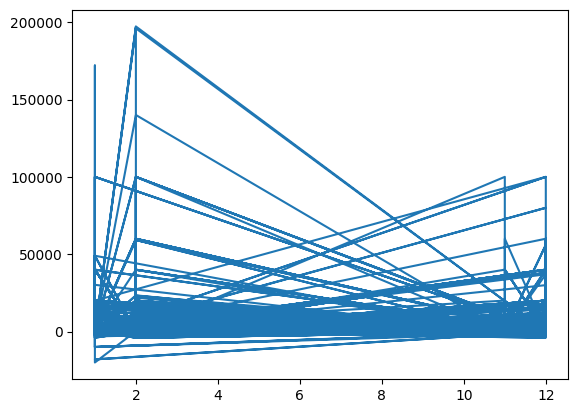

In [84]:
plt.plot(traindf['month'],traindf['money_transacted'])

Highest Transaction was made in the month of February.

<Axes: xlabel='month', ylabel='money_transacted'>

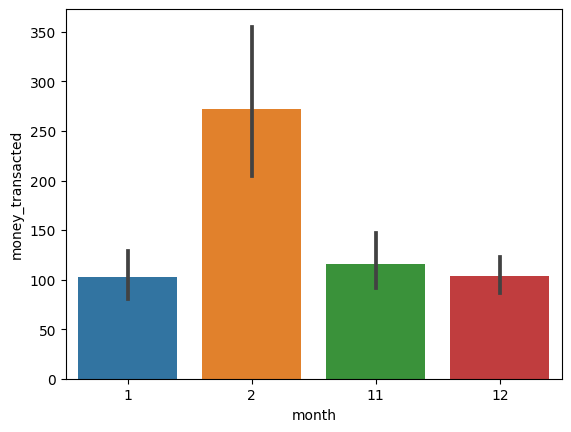

In [85]:
sns.barplot(x=traindf['month'],y=traindf['money_transacted'])

<Axes: xlabel='month', ylabel='money_transacted'>

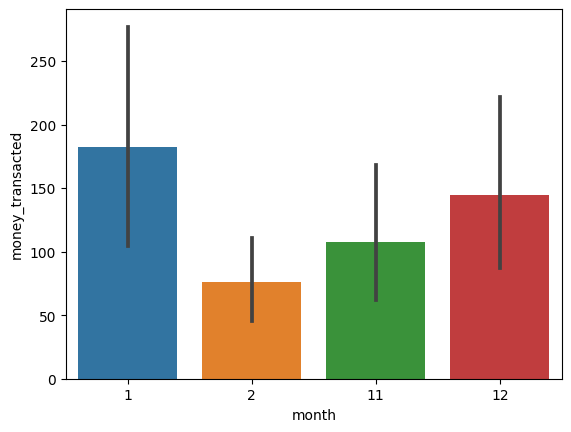

In [86]:
sns.barplot(x=testdf['month'],y=testdf['money_transacted'])

*   Most transactions were made in the month of February for train data
*   Highest transactions were in January for Test data





Encoding train and test datasets

In [87]:
#Creating dummies
traindf=pd.get_dummies(columns=['partner_category','payment_method','device_type'],data=traindf)

In [88]:
testdf=pd.get_dummies(columns=['partner_category','payment_method','device_type'],data=testdf)

In [89]:
traindf

,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud,year,month,day,partner_category_cat_1,partner_category_cat_2,...,payment_method_e_wallet_payments,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,device_type_android_devices,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,17539344,47334,-5.0,2,0,2016,11,15,1,0,...,0,0,1,0,0,0,1,0,0,0
1,24710841,78890,100.0,2,0,2017,1,11,0,1,...,1,0,0,0,0,0,0,0,1,0
2,24265476,78890,50.0,2,0,2016,12,7,0,1,...,1,0,0,0,0,0,0,0,1,0
3,10240000,102557,1000.0,2,0,2017,1,11,0,0,...,0,1,0,0,0,0,0,0,1,0
4,5880625,118335,200.0,2,0,2016,11,16,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,19686969,47334,-100.0,2,0,2016,11,30,1,0,...,0,0,1,0,0,0,1,0,0,0
76525,11662225,118335,200.0,2,0,2017,1,8,1,0,...,0,0,0,0,0,1,0,0,1,0
76526,374544,47334,-3.5,2,0,2016,12,26,1,0,...,0,0,1,0,0,0,1,0,0,0
76527,1687401,47334,-20.0,2,0,2016,12,11,1,0,...,0,0,1,0,0,0,1,0,0,0


Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
y=traindf['is_fraud']
X=traindf.drop(['is_fraud'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61223, 26)
(15306, 26)
(61223,)
(15306,)


Data Standardization

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Model Building!

In [92]:
#Decision Tree Classifier before smote
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_dtc=dtc.fit(X_train,y_train)
y_trains=model_dtc.predict(X_train)
y_pred=model_dtc.predict(X_test)

In [93]:
from sklearn import metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve , auc , f1_score

In [94]:
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

99.95426630079707
[[15267     2]
 [    5    32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15269
           1       0.94      0.86      0.90        37

    accuracy                           1.00     15306
   macro avg       0.97      0.93      0.95     15306
weighted avg       1.00      1.00      1.00     15306

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61106
           1       1.00      0.97      0.99       117

    accuracy                           1.00     61223
   macro avg       1.00      0.99      0.99     61223
weighted avg       1.00      1.00      1.00     61223



In [95]:
#Smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("Class distribution before resampling:", y.value_counts())
print("Class distribution after resampling:", y_smote.value_counts())

Class distribution before resampling: 0    76375
1      154
Name: is_fraud, dtype: int64
Class distribution after resampling: 0    61106
1    61106
Name: is_fraud, dtype: int64


In [96]:
#Decision Tree Classifier after smote
model_dtc=dtc.fit(X_smote,y_smote)
y_trains=model_dtc.predict(X_smote)
y_pred=model_dtc.predict(X_test)

In [97]:
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_smote, y_trains))

99.90853260159415
[[15265     4]
 [   10    27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15269
           1       0.87      0.73      0.79        37

    accuracy                           1.00     15306
   macro avg       0.94      0.86      0.90     15306
weighted avg       1.00      1.00      1.00     15306

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61106
           1       1.00      1.00      1.00     61106

    accuracy                           1.00    122212
   macro avg       1.00      1.00      1.00    122212
weighted avg       1.00      1.00      1.00    122212



GridsearchCV

In [98]:
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2']}

In [99]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)
grid_search.fit(X_smote, y_smote)
best_params = grid_search.best_params_
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.999574511273936


In [100]:
dtc=DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                               min_samples_split=best_params['min_samples_split'],
                               min_samples_leaf=best_params['min_samples_leaf'],
                               max_features=best_params['max_features'])
model_dtc=dtc.fit(X_smote,y_smote)
y_trains=model_dtc.predict(X_smote)
y_pred=model_dtc.predict(X_test)

In [101]:
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_smote, y_trains))

99.8562655167908
[[15255    14]
 [    8    29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15269
           1       0.67      0.78      0.72        37

    accuracy                           1.00     15306
   macro avg       0.84      0.89      0.86     15306
weighted avg       1.00      1.00      1.00     15306

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61106
           1       1.00      1.00      1.00     61106

    accuracy                           1.00    122212
   macro avg       1.00      1.00      1.00    122212
weighted avg       1.00      1.00      1.00    122212



SVC

In [102]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc=svc.fit(X_train,y_train)
y_trains=svc.predict(X_train)
y_pred=svc.predict(X_test)

In [103]:
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

99.77786488958579
[[15265     4]
 [   30     7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15269
           1       0.64      0.19      0.29        37

    accuracy                           1.00     15306
   macro avg       0.82      0.59      0.65     15306
weighted avg       1.00      1.00      1.00     15306

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61106
           1       0.76      0.30      0.43       117

    accuracy                           1.00     61223
   macro avg       0.88      0.65      0.71     61223
weighted avg       1.00      1.00      1.00     61223



In [104]:
model=svc.fit(X_smote,y_smote)
y_trains=model.predict(X_smote)
y_pred=model.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_smote, y_trains))

98.6998562655168
[[15073   196]
 [    3    34]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15269
           1       0.15      0.92      0.25        37

    accuracy                           0.99     15306
   macro avg       0.57      0.95      0.62     15306
weighted avg       1.00      0.99      0.99     15306

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     61106
           1       0.99      0.98      0.98     61106

    accuracy                           0.98    122212
   macro avg       0.98      0.98      0.98    122212
weighted avg       0.98      0.98      0.98    122212



SVC performs better

In [106]:
scaler = StandardScaler()
scaler.fit(testdf)
testdf = scaler.transform(testdf)

In [107]:
test=model.predict(testdf)


In [108]:
sample_submission = pd.read_csv("/content/sample_submission-1611221030305.csv")
sample_submission["is_fraud"] = test
sample_submission.to_csv("submission.csv", index=False)

In [109]:
pd.read_csv('submission.csv')

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0
...,...,...
19128,5332775378111,0
19129,939262915465237,0
19130,18324574916544,0
19131,893473728055875,0
